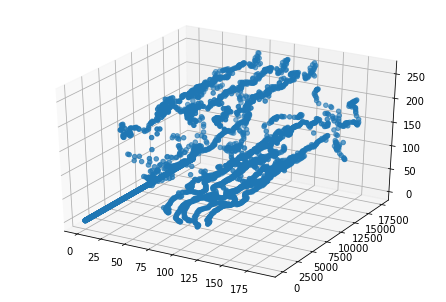

In [8]:
import os
import json
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

def read_json(file):
    skeletonDict = json.load(open(file,'r'))
    bodySkeleton = numpy.array(skeletonDict['Body']).squeeze()
    if len(bodySkeleton.shape)>2:
        bodySkeleton = bodySkeleton[0]
    return bodySkeleton[:,:2]

skeleton_folder = '/Users/liweijie/SLR/scripts/01April_2010_Thursday_heute_default-0'
file_list = os.listdir(skeleton_folder)
file_list.sort()
mat = []
for i,file in enumerate(file_list):
    file_path = os.path.join(skeleton_folder,file)
    skeleton = read_json(file_path)
    t = 100*i*numpy.ones([skeleton.shape[0],1])
    skeleton_t = numpy.concatenate([skeleton,t],1)
    mat.append(skeleton_t)
mat = numpy.concatenate(mat,0)

x = mat[:,0]
z = mat[:,1]
y = mat[:,2]

# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)